In [1]:
# Libraries for Keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.optimizers import Adam

# Another
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

print("Import Library done")

Using TensorFlow backend.


Import Library done


In [2]:
# Define
## Constant
### Input Image Size
height = 32
width = 32
channels = 3
### Class Amount
classes = 43
### Ratio to split Data Train into 2 part Train and Val: 80% to train and 20% to val.
ratio = 0.2

## Variable
data=[]
labels=[]

# Main
## Reading the input images and putting them into a numpy array
for i in range(classes) :
    path = "./input/train/{0}/".format(i)
    print("Load Data class {}".format(i))
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")            
Cells=np.array(data)
labels=np.array(labels)
print("Load Data Success")

Load Data class 0
Load Data class 1
Load Data class 2
Load Data class 3
Load Data class 4
Load Data class 5
Load Data class 6
Load Data class 7
Load Data class 8
Load Data class 9
Load Data class 10
Load Data class 11
Load Data class 12
Load Data class 13
Load Data class 14
Load Data class 15
Load Data class 16
Load Data class 17
Load Data class 18
Load Data class 19
Load Data class 20
Load Data class 21
Load Data class 22
Load Data class 23
Load Data class 24
Load Data class 25
Load Data class 26
Load Data class 27
Load Data class 28
Load Data class 29
Load Data class 30
Load Data class 31
Load Data class 32
Load Data class 33
Load Data class 34
Load Data class 35
Load Data class 36
Load Data class 37
Load Data class 38
Load Data class 39
Load Data class 40
Load Data class 41
Load Data class 42
Load Data Success


In [3]:
# Define
## Variable
data=[]

# Main
## Load Test Data
print("Load Test Data")
y_test=pd.read_csv("./input/Test.csv")
_labels=y_test['Path'].values
y_test=y_test['ClassId'].values
for f in _labels:
    path ='./input/test/'+f.replace('Test/', '')
    image=cv2.imread(path)
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255

Load Test Data


In [4]:
EPOCHS = 50
BATCH_SIZE = 200
## Compilation of the model
adam = Adam(lr=0.002)
max_score = 0.0
data_score = []

def trainModel(X_train, X_val, y_train, y_val,X_test,y_test):
    global max_score
    global data_score
    
    ## Prepare Data
    X_train = X_train.astype('float32')/255 
    X_val = X_val.astype('float32')/255
    y_train = to_categorical(y_train, classes)
    y_val = to_categorical(y_val, classes)
    
    ## Create Model
    model = Sequential()
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6. Activation = RELU.
    model.add(Conv2D(filters=6, kernel_size=(5,5),strides=1, padding='valid', activation='relu', input_shape=X_train.shape[1:]))
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    model.add(MaxPool2D(pool_size=(2, 2),strides=2, padding='valid'))
    # Layer 2: Convolutional. Output = 10x10x16. Activation = RELU.
    model.add(Conv2D(filters=16, kernel_size=(5,5),strides=1, padding='valid', activation='relu'))
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    model.add(MaxPool2D(pool_size=(2, 2),strides=2, padding='valid'))
    # Flatten. Input = 5x5x16. Output = 400.
    model.add(Flatten())
    # Layer 3: Fully Connected. Input = 400. Output = 120. Activation = RELU.
    model.add(Dense(120, activation='relu'))
    # Layer 4: Fully Connected. Input = 120. Output = 84. Activation = RELU.
    model.add(Dense(84, activation='relu'))
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    model.add(Dense(43, activation='softmax'))
    model.compile(
    loss='categorical_crossentropy', 
    optimizer=adam, 
    metrics=['accuracy']
    )
    
    ## Train Model
    history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,validation_data=(X_val, y_val))
    
    ## Predict
    pred = model.predict_classes(X_test)
    score = accuracy_score(y_test, pred)
    data_score.append(score)
    print("Test Accuracy: {0}".format(score))
    
    if score > max_score:
        max_score = score
        ## Save Model
        model.save("./model/model.h5")
        print("Saved model to disk")

In [5]:
s=np.arange(Cells.shape[0])
np.random.seed(classes)
np.random.shuffle(s)

cv = KFold(n_splits=5, shuffle=True, random_state=np.random)
# cv = KFold(n_splits=5, shuffle=False)
count = 0
for train_index, test_index in cv.split(Cells):
#     print("Train Index: ", train_index, "\n")
#     print("Test Index: ", test_index)
    count += 1
    X_train, X_val, y_train, y_val = Cells[train_index], Cells[test_index], labels[train_index], labels[test_index]

    print("Train model part {0}: ".format(count))
    trainModel(X_train, X_val, y_train, y_val,X_test,y_test)

Train model part 1: 
Train on 31367 samples, validate on 7842 samples
Epoch 1/50
31367/31367 [==============================] - 8s 269us/step - loss: 1.9046 - accuracy: 0.4934 - val_loss: 0.8578 - val_accuracy: 0.7497
Epoch 2/50
31367/31367 [==============================] - 8s 262us/step - loss: 0.5733 - accuracy: 0.8370 - val_loss: 0.4246 - val_accuracy: 0.8783
Epoch 3/50
31367/31367 [==============================] - 8s 260us/step - loss: 0.3147 - accuracy: 0.9134 - val_loss: 0.2888 - val_accuracy: 0.9231
Epoch 4/50
31367/31367 [==============================] - 8s 261us/step - loss: 0.2249 - accuracy: 0.9384 - val_loss: 0.2203 - val_accuracy: 0.9401
Epoch 5/50
31367/31367 [==============================] - 8s 262us/step - loss: 0.1525 - accuracy: 0.9583 - val_loss: 0.1980 - val_accuracy: 0.9452
Epoch 6/50
31367/31367 [==============================] - 8s 262us/step - loss: 0.1150 - accuracy: 0.9695 - val_loss: 0.1626 - val_accuracy: 0.9566
Epoch 7/50
31367/31367 [==================

Epoch 5/50
31367/31367 [==============================] - 8s 258us/step - loss: 0.3119 - accuracy: 0.9060 - val_loss: 0.3655 - val_accuracy: 0.8933
Epoch 6/50
31367/31367 [==============================] - 8s 258us/step - loss: 0.2573 - accuracy: 0.9228 - val_loss: 0.3116 - val_accuracy: 0.9142
Epoch 7/50
31367/31367 [==============================] - 8s 259us/step - loss: 0.2131 - accuracy: 0.9360 - val_loss: 0.2712 - val_accuracy: 0.9232
Epoch 8/50
31367/31367 [==============================] - 8s 257us/step - loss: 0.1837 - accuracy: 0.9438 - val_loss: 0.2627 - val_accuracy: 0.9262
Epoch 9/50
31367/31367 [==============================] - 8s 258us/step - loss: 0.1631 - accuracy: 0.9488 - val_loss: 0.2696 - val_accuracy: 0.9235
Epoch 10/50
31367/31367 [==============================] - 8s 258us/step - loss: 0.1442 - accuracy: 0.9555 - val_loss: 0.2305 - val_accuracy: 0.9339
Epoch 11/50
31367/31367 [==============================] - 8s 259us/step - loss: 0.1234 - accuracy: 0.9605 - va

31367/31367 [==============================] - 8s 259us/step - loss: 0.1538 - accuracy: 0.9538 - val_loss: 0.2540 - val_accuracy: 0.9294
Epoch 10/50
31367/31367 [==============================] - 8s 258us/step - loss: 0.1425 - accuracy: 0.9565 - val_loss: 0.2519 - val_accuracy: 0.9334
Epoch 11/50
31367/31367 [==============================] - 8s 260us/step - loss: 0.1284 - accuracy: 0.9603 - val_loss: 0.2602 - val_accuracy: 0.9352
Epoch 12/50
31367/31367 [==============================] - 8s 260us/step - loss: 0.1183 - accuracy: 0.9619 - val_loss: 0.2462 - val_accuracy: 0.9376
Epoch 13/50
31367/31367 [==============================] - 8s 260us/step - loss: 0.1113 - accuracy: 0.9647 - val_loss: 0.2445 - val_accuracy: 0.9376
Epoch 14/50
31367/31367 [==============================] - 8s 259us/step - loss: 0.1058 - accuracy: 0.9675 - val_loss: 0.2498 - val_accuracy: 0.9382
Epoch 15/50
31367/31367 [==============================] - 8s 261us/step - loss: 0.0911 - accuracy: 0.9712 - val_loss:

31367/31367 [==============================] - 10s 306us/step - loss: 3.4865 - accuracy: 0.0554 - val_loss: 3.4897 - val_accuracy: 0.0562
Epoch 14/50
31367/31367 [==============================] - 11s 339us/step - loss: 3.4863 - accuracy: 0.0569 - val_loss: 3.4899 - val_accuracy: 0.0550
Epoch 15/50
31367/31367 [==============================] - 9s 286us/step - loss: 3.4861 - accuracy: 0.0570 - val_loss: 3.4895 - val_accuracy: 0.0550
Epoch 16/50
31367/31367 [==============================] - 9s 280us/step - loss: 3.4864 - accuracy: 0.0570 - val_loss: 3.4898 - val_accuracy: 0.0562
Epoch 17/50
31367/31367 [==============================] - 8s 270us/step - loss: 3.4860 - accuracy: 0.0557 - val_loss: 3.4889 - val_accuracy: 0.0562
Epoch 18/50
31367/31367 [==============================] - 10s 314us/step - loss: 3.4859 - accuracy: 0.0551 - val_loss: 3.4897 - val_accuracy: 0.0562
Epoch 19/50
31367/31367 [==============================] - 9s 282us/step - loss: 3.4862 - accuracy: 0.0542 - val_lo

31368/31368 [==============================] - 10s 304us/step - loss: 0.1355 - accuracy: 0.9561 - val_loss: 0.2133 - val_accuracy: 0.9407
Epoch 18/50
31368/31368 [==============================] - 9s 297us/step - loss: 0.1053 - accuracy: 0.9670 - val_loss: 0.2016 - val_accuracy: 0.9454
Epoch 19/50
31368/31368 [==============================] - 9s 298us/step - loss: 0.0928 - accuracy: 0.9707 - val_loss: 0.2289 - val_accuracy: 0.9360
Epoch 20/50
31368/31368 [==============================] - 9s 300us/step - loss: 0.0801 - accuracy: 0.9740 - val_loss: 0.2027 - val_accuracy: 0.9441
Epoch 21/50
31368/31368 [==============================] - 9s 295us/step - loss: 0.0683 - accuracy: 0.9786 - val_loss: 0.2083 - val_accuracy: 0.9450
Epoch 22/50
31368/31368 [==============================] - 9s 298us/step - loss: 0.0631 - accuracy: 0.9792 - val_loss: 0.1902 - val_accuracy: 0.9533
Epoch 23/50
31368/31368 [==============================] - 9s 299us/step - loss: 0.0469 - accuracy: 0.9857 - val_loss

[0.9315122723673792, 0.8646872525732383, 0.8561361836896278, 0.8459224069675376, 0.876959619952494]


Text(0.5, 0, 'Accuracy')

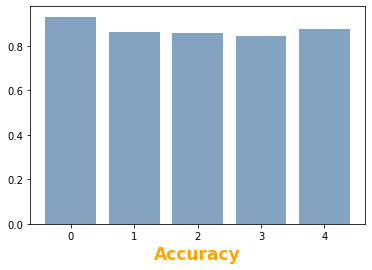

In [7]:
print(data_score)
y_pos = np.arange(len(data_score))
plt.bar(y_pos, data_score, color=(0.2, 0.4, 0.6, 0.6))
 
# Custom Axis title
plt.xlabel('Accuracy', fontweight='bold', color = 'orange', fontsize='17', horizontalalignment='center')